# **GOOGLE STOCK MARKET ANALYSIS**

In [1]:
import pandas as pd 
import requests 
import bs4
# impoting yahoo finance 
import yfinance as yf 
# impoting libraires for 
# impoting libraires for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# importing the prophet model
from prophet import Prophet
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from statsmodels.tsa import seasonal_decomposition as smd
import numpy as np
import math
import datetime as dt


# ignore warnings
import warnings
warnings.filterwarnings('ignore')




c:\Users\ali\Desktop\web_scraping\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# pip install --no-cache-dir prophet

In [3]:

# pip install fbprophet


In [4]:
# defining the tricker symbol 



tikersymbol = 'GOOGL'
tikerdata = yf.Ticker(tikersymbol)
tikerdf = tikerdata.history(
    start='2010-01-01', end = '2025-12-30')
tikerdf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,15.571782,15.635366,15.504474,15.566814,78169752,0.0,0.0
2010-01-05 00:00:00-05:00,15.577497,15.593890,15.437414,15.498265,120067812,0.0,0.0
2010-01-06 00:00:00-05:00,15.544710,15.544710,15.060382,15.107573,158988852,0.0,0.0
2010-01-07 00:00:00-05:00,15.135887,15.150790,14.719862,14.755876,256315428,0.0,0.0
2010-01-08 00:00:00-05:00,14.703717,14.983137,14.631937,14.952588,188783028,0.0,0.0


In [5]:
# saving the data into csv file 
tikerdf.to_csv("GOOGLE.csv")

In [6]:
# loading the data from csv file 
df = pd.read_csv("GOOGLE.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,15.571782,15.635366,15.504474,15.566814,78169752,0.0,0.0
1,2010-01-05 00:00:00-05:00,15.577497,15.593890,15.437414,15.498265,120067812,0.0,0.0
2,2010-01-06 00:00:00-05:00,15.544710,15.544710,15.060382,15.107573,158988852,0.0,0.0
3,2010-01-07 00:00:00-05:00,15.135887,15.150790,14.719862,14.755876,256315428,0.0,0.0
4,2010-01-08 00:00:00-05:00,14.703717,14.983137,14.631937,14.952588,188783028,0.0,0.0


In [7]:
df.shape

(4022, 8)

In this dataset that we scraped from **2020 to 2025**, there are **1,506 rows** and **8 columns**.


In [8]:
# pip install seaborn

In [9]:
# pip install matplotlib plotly

## **EDA(Exploratry Data Analysis)**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4022 non-null   object 
 1   Open          4022 non-null   float64
 2   High          4022 non-null   float64
 3   Low           4022 non-null   float64
 4   Close         4022 non-null   float64
 5   Volume        4022 non-null   int64  
 6   Dividends     4022 non-null   float64
 7   Stock Splits  4022 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 251.5+ KB


in our dataset the one column is object (Date ), the other er columns are float64 (Open, High, Low, Close, Volume, Dividends, Stock Splits)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,4022.0,7.012476e+01,5.886642e+01,1.088646e+01,2.599323e+01,5.157754e+01,1.083935e+02,3.259968e+02
High,4022.0,7.087768e+01,5.956643e+01,1.098507e+01,2.632325e+01,5.215345e+01,1.102343e+02,3.286150e+02
Low,4022.0,6.938609e+01,5.817911e+01,1.077022e+01,2.571756e+01,5.089868e+01,1.067853e+02,3.189614e+02
Close,4022.0,7.015160e+01,5.889274e+01,1.083083e+01,2.595253e+01,5.147780e+01,1.086218e+02,3.232286e+02
Volume,4022.0,5.495420e+07,4.642455e+07,9.312000e+06,2.733450e+07,3.696000e+07,7.026566e+07,5.923990e+08
Dividends,4022.0,3.555445e-04,8.518622e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e-01
Stock Splits,4022.0,5.469418e-03,3.169237e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01


## **Data  Visualization**

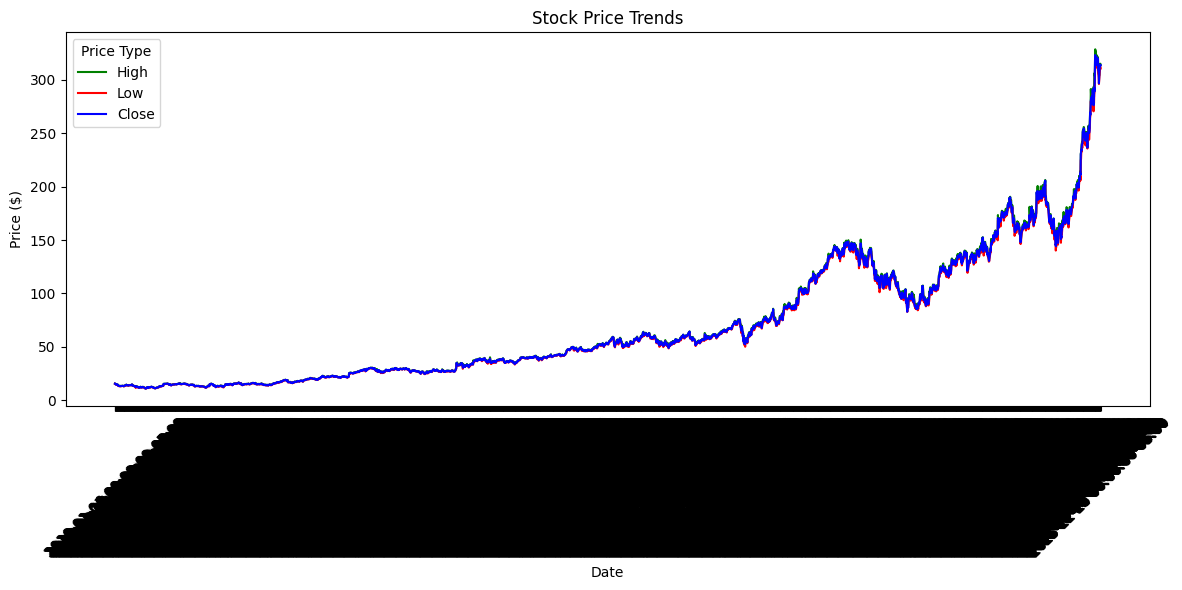

In [12]:
# df['Date'] = pd.to_datetime(df['Date'])# Set 'Date' column as index

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot each line separately
sns.lineplot(data=df, x='Date', y='High', color='green', label='High')
sns.lineplot(data=df, x='Date', y='Low', color='red', label='Low')
sns.lineplot(data=df, x='Date', y='Close', color='blue', label='Close')

# Add title and labels
plt.title('Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(title='Price Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
# ploting the same but using plotly and over target variable is , what is the highest price and lowest 
fig = px.line(df,x=('Date'),y=['Close','High','Low'],title="Stock price trends")
fig.show()




In [14]:
# changing the name of column 
df = df.rename(columns={'ds':'Date','y':'Close'})
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,15.571782,15.635366,15.504474,15.566814,78169752,0.0,0.0
1,2010-01-05 00:00:00-05:00,15.577497,15.593890,15.437414,15.498265,120067812,0.0,0.0
2,2010-01-06 00:00:00-05:00,15.544710,15.544710,15.060382,15.107573,158988852,0.0,0.0
3,2010-01-07 00:00:00-05:00,15.135887,15.150790,14.719862,14.755876,256315428,0.0,0.0
4,2010-01-08 00:00:00-05:00,14.703717,14.983137,14.631937,14.952588,188783028,0.0,0.0


In [15]:
# Check the data types and first few rows
print("DataFrame Info:")
print(df.info())
print("\nFirst few rows of Date column:")
print(df['Date'].head())
print("\nDate column type:", type(df['Date'].iloc[0]))
print("\nDate column timezone info (first 5 rows):")
print(df['Date'].head().apply(lambda x: x.tzinfo if hasattr(x, 'tzinfo') else 'No timezone'))

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4022 non-null   object 
 1   Open          4022 non-null   float64
 2   High          4022 non-null   float64
 3   Low           4022 non-null   float64
 4   Close         4022 non-null   float64
 5   Volume        4022 non-null   int64  
 6   Dividends     4022 non-null   float64
 7   Stock Splits  4022 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 251.5+ KB
None

First few rows of Date column:
0    2010-01-04 00:00:00-05:00
1    2010-01-05 00:00:00-05:00
2    2010-01-06 00:00:00-05:00
3    2010-01-07 00:00:00-05:00
4    2010-01-08 00:00:00-05:00
Name: Date, dtype: object

Date column type: <class 'str'>

Date column timezone info (first 5 rows):
0    No timezone
1    No timezone
2    No timezone
3    No timezone
4    No timezone
Name:

After conversion - first few rows of ds column:
0   2010-01-04
1   2010-01-05
2   2010-01-06
3   2010-01-07
4   2010-01-08
Name: ds, dtype: datetime64[ns]

Timezone info (should be None): None


03:01:53 - cmdstanpy - INFO - Chain [1] start processing
03:01:56 - cmdstanpy - INFO - Chain [1] done processing


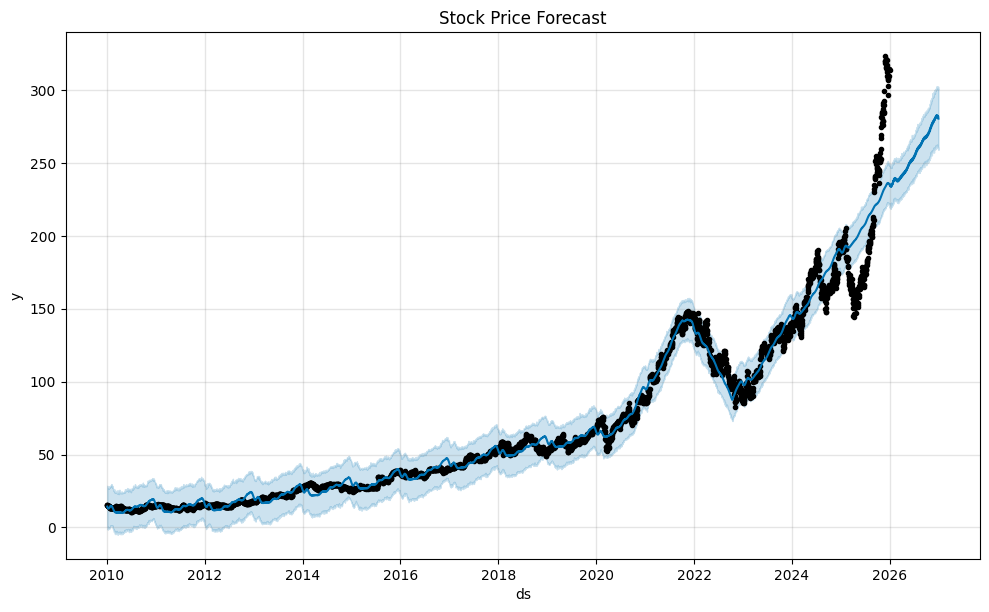

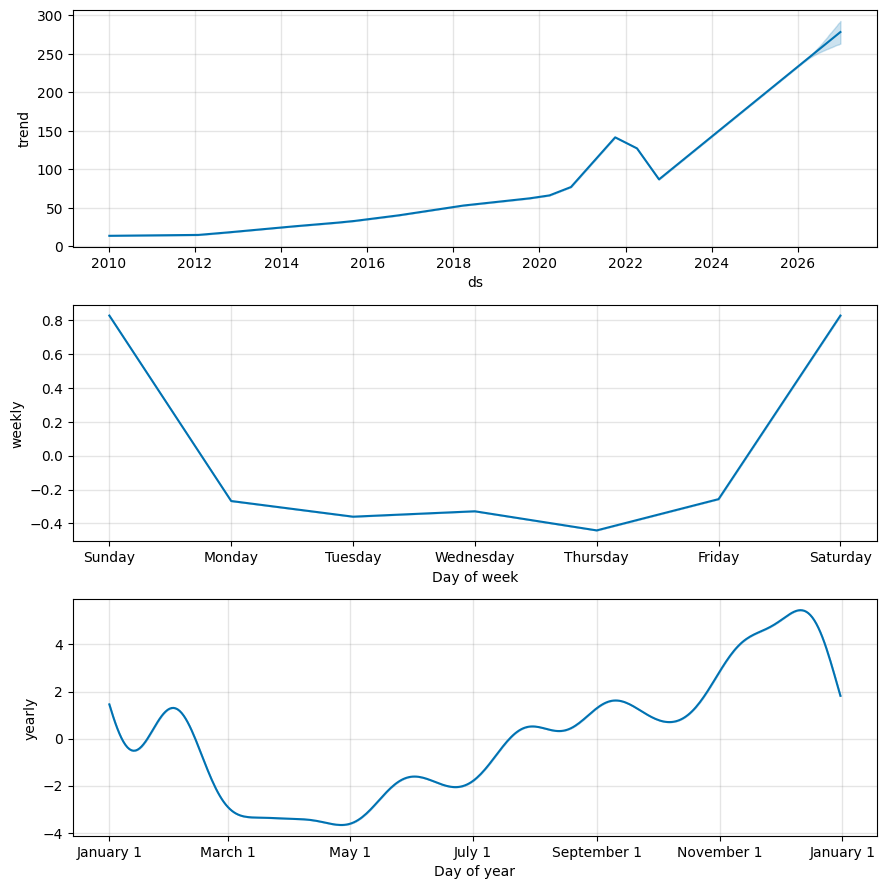

In [16]:
# Convert to string and back to datetime to remove timezone
df['ds'] = pd.to_datetime(df['Date'].astype(str).str[:19])

# Alternative: If the above doesn't work, try this
# df['ds'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d %H:%M:%S'))

# Set the target variable
df['y'] = df['Close']

# Verify the conversion
print("After conversion - first few rows of ds column:")
print(df['ds'].head())
print("\nTimezone info (should be None):", df['ds'].dt.tz)

# Now try the model with error handling
try:
    model = Prophet()
    model.fit(df[['ds', 'y']])
    
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    
    # Plot the results
    fig1 = model.plot(forecast)
    plt.title('Stock Price Forecast')
    plt.show()
    
    fig2 = model.plot_components(forecast)
    plt.show()
    
except Exception as e:
    print("Error occurred:", str(e))
    print("\nTrying alternative approach...")
    
    # Alternative approach: Convert to UTC first
    df['ds'] = pd.to_datetime(df['Date'], utc=True).dt.tz_convert(None)
    model = Prophet()
    model.fit(df[['ds', 'y']])
    
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    
    # Plot the results
    fig1 = model.plot(forecast)
    plt.title('Stock Price Forecast')
    plt.show()
    
    fig2 = model.plot_components(forecast)
    plt.show()

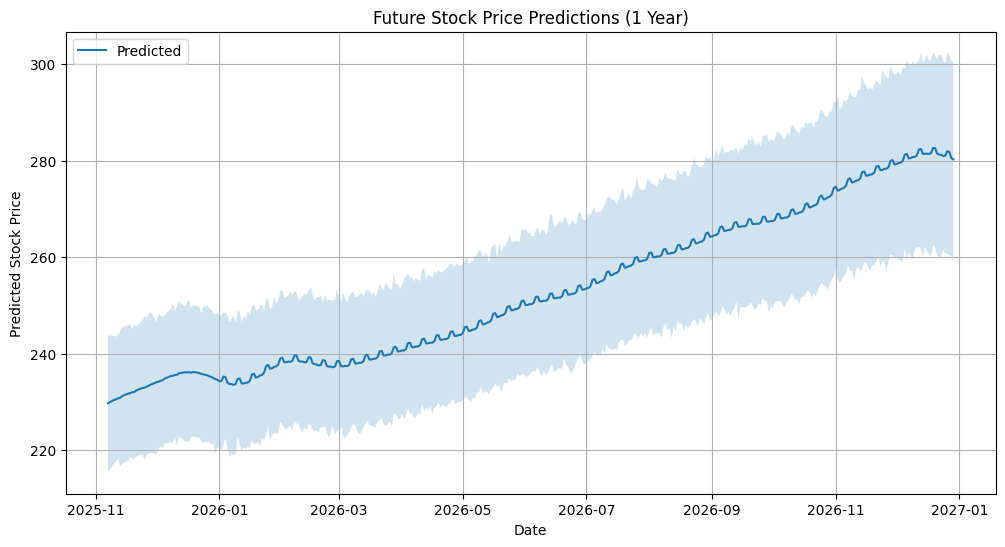

In [17]:
# Plot just the future predictions
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'].tail(400), forecast['yhat'].tail(400), label='Predicted')
plt.fill_between(forecast['ds'].tail(400), 
                forecast['yhat_lower'].tail(400), 
                forecast['yhat_upper'].tail(400), 
                alpha=0.2)
plt.title('Future Stock Price Predictions (1 Year)')
plt.xlabel('Date')
plt.ylabel('Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()